<h3><font color=pink>Importing the libraries:</font>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.datasets import mnist 

<h3><font color=pink>Loading the Mnist data set:</font>

In [2]:
(x_train,y_train), (x_test,y_test)= mnist.load_data()
print(np.shape(x_train),np.shape(y_train))
print(np.shape(x_test),np.shape(y_test))

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


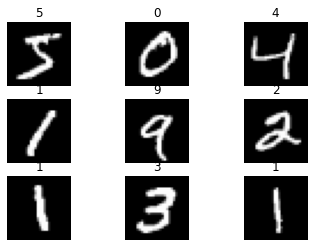

In [3]:
# images vizualizzation
fig,axs=plt.subplots(nrows=3,ncols=3)
axs= axs.flatten()
for ax, j in zip(axs,range(9)):
  ax.axis("off")
  ax.imshow(x_train[j],cmap="gray") 
  ax.set_title(y_train[j])
plt.show()

<h3><font color=pink>Data preparation:</font>

In [4]:
#We divide by 255 to normalize our dataset
x_train_v=x_train.reshape(-1,28*28)/255 
x_test_v=x_test.reshape(-1,28*28)/255
print(np.shape(x_train_v))
print(np.shape(x_test_v))

(60000, 784)
(10000, 784)


In [5]:
# one hot encoding: 
from tensorflow.keras.utils import to_categorical 
y_train_c= to_categorical(y_train)
y_test_c= to_categorical(y_test)
print("Before:",np.shape(y_train),"After:" ,np.shape(y_train_c))

Before: (60000,) After: (60000, 10)


In [8]:
print("Before:",y_train[1],"after:" ,y_train_c[1])

Before: 0 after: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<h2><font color=pink>The models:</font>

Model 1: Single layer perceptron (SLP)

(With 0 hidden layrs)

In [9]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

In [10]:
def SLP(): 
  inp=Input(shape=(28*28,))
  outp=Dense(10,activation="softmax")(inp)
  model=Model(inp,outp)
  model.summary()
  return model

In [19]:
#cost function
cf="categorical_crossentropy"

#Optimizer (descent gradient)

optim=tf.keras.optimizers.SGD(learning_rate=0.001)

In [13]:
model1=SLP()
model1.compile(loss=cf, optimizer=optim, metrics=["accuracy"])
hist=model1.fit(x_train_v,y_train_c, validation_data=(x_test_v,y_test_c), epochs=100, batch_size=100,shuffle=True)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
600/600 [==============================] - 2s 2ms/step - loss: 2.1017 - accuracy: 0.2976 - val_loss: 1.8391 - val_accuracy: 0.5275
Epoch 2/100
600/600 [==============================] - 1s 2ms/step - loss: 1.6618 - accuracy: 0.6254 - val_loss: 1.4877 - val_accuracy: 0.7007
Epoch 3/100
600/600 [==============================] - 1s 2ms/step - loss: 1.3839 - accuracy: 0.7247 - val_loss: 1.2598 - val_accuracy: 0.7620
Epoch 4/100
600/600 [===

Text(0, 0.5, 'Error')

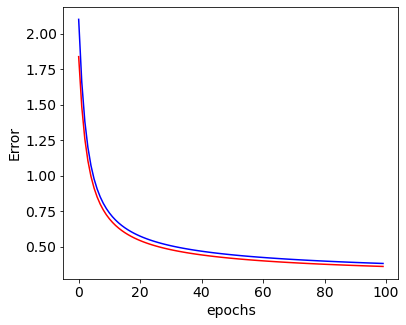

In [14]:
plt.rcParams["figure.figsize"] = [6., 5.]
plt.rcParams.update({'font.size': 14})
plt.plot(hist.history["loss"],c='b',label="Training errpr")
plt.plot(hist.history["val_loss"],c='r',label="Test error")
plt.xlabel("epochs")
plt.ylabel("Error")

Model 2: Multilayer perceptron (MLP)

In [15]:
def MLP(act):
  inp=Input(shape=(784,))
  l1=Dense(200, activation=act)(inp)
  l2=Dense(100,activation=act)(l1)
  l3=Dense(60,activation=act)(l2)
  l4=Dense(30,activation=act)(l3)
  outp=Dense(10,activation="softmax")(l4)
  model=Model(inp,outp)
  model.summary() 
  return model

In [17]:
model2= MLP("relu")
model2.compile(loss=cf, optimizer=optim, metrics=["accuracy"])
hist=model2.fit(x_train_v,y_train_c, validation_data=(x_test_v,y_test_c), epochs=100, batch_size=100,shuffle=True)


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_7 (Dense)             (None, 200)               157000    
                                                                 
 dense_8 (Dense)             (None, 100)               20100     
                                                                 
 dense_9 (Dense)             (None, 60)                6060      
                                                                 
 dense_10 (Dense)            (None, 30)                1830      
                                                                 
 dense_11 (Dense)            (None, 10)                310       
                                                                 
Total params: 185,300
Trainable params: 185,300
Non-trainab

Text(0, 0.5, 'Error')

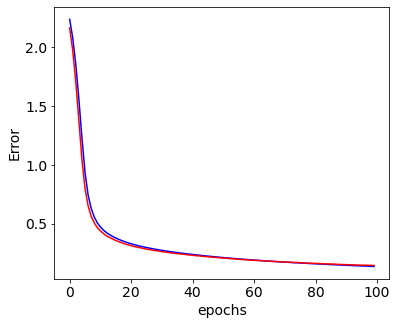

In [18]:
plt.rcParams["figure.figsize"] = [6., 5.]
plt.rcParams.update({'font.size': 14})
plt.plot(hist.history["loss"],c='b',label="Training errpr")
plt.plot(hist.history["val_loss"],c='r',label="Test error")
plt.xlabel("epochs")
plt.ylabel("Error")